Тема: Аналитика успеваемости студентов с помощью методов Big Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

1. Student_ID - Уникальный идентификатор студента.
2. First_Name - Имя студента
3. Last_Name - Фамилия студента
4. Email - Электронная почта
5. Gender - Пол студента
6. Age - Возраст студента
7. Department - Факультет/отделение
8. Attendance (%) - Посещаемость студента
9. Midterm_Score - Результат промежуточного экзамена
10. Final_Score - Результат финального экзамена
11. Assignments_Avg - Средний балл за задания
12. Quizzes_Avg - Средний балл за тесты
13. Participation_Score - Балл за активность на занятии
14. Projects_Score - Оценка за проекты
15. Total_Score - Мнение студентов о своём балле
16. Grade - Итоговая оценка: ключевой показатель успеваемости
17. Study_Hours_per_Week - Часы учебы в неделю
18. Extracurricular_Activities - Внеучебная активность
19. Internet_Access_at_Home - Доступ к интернету дома
20. Parent_Education_Level - Образование родителей
21. Family_Income_Level - Уровень дохода семьи
22. Stress_Level (1-10) - Уровень стресса
23. Sleep_Hours_per_Night - Часы сна за ночь
24. Total_Score_Original - Реальные результаты студентов
25. Week_of_Semester - неделя семестра
26. Learning_Efficiency - эффективность обучения

1. Парадокс продуктивного стресса
*Студенты с уровнем стресса 8-10 баллов имеют вероятность получить оценку F ниже, чем студенты с стрессом 1-3 балла, которые уверены в себе и своих силах.*

2. Гипотеза "компенсаторного механизма"
*Студенты с ограниченным доступом в интернет компенсируют это более высокой посещаемостью занятий на различных факультетах*

3. Гипотеза об накопленной усталости
*У студентов происходит заметное снижение эффективности обучения к концу семестра*

4. Гипотеза идеального распорядка дня
*Студенты, у которых соотношение учёба/сон равна приблизительно 0.2-0.4 имеют высокие результаты по экзаменам*

5. Гипотеза "социального лифта"
*Студенты из семей с низким доходом, но где родители имеют высшее образование, преодолевают экономические барьеры и достигают результатов, сопоставимых со студентами из высокодоходных семей*

6. Гипотеза об "экзаменационном прорыве"
*Есть небольшая доля студентов, которые, несмотря на плохие результаты за тесты и задания, смогли сдать промежуточные и итоговые экзамены на очень высокие баллы*









In [2]:
df = pd.read_csv('student_perfomance_data.csv')
pd.set_option('display.max_columns', None)
df.sample(10)

,Student_ID,First_Name,Last_Name,Email,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,Assignments_Avg,Quizzes_Avg,Participation_Score,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night,Total_Score_Original,Week_of_Semester,Learning_Efficiency (%)
2925,S3925,Emma,Jones,student2925@university.com,Male,20,Business,66.28,83.26,70.40,83.47,37.97,16.0,86.00,23.3380,C,8.4,No,No,Master's,High,1,8.2,45.08700,18,68.086076
688,S1688,Omar,Williams,student688@university.com,Female,22,Business,34.41,70.59,83.26,53.57,52.58,61.0,97.06,73.5370,C,13.6,No,Yes,NaN,High,9,5.8,76.09700,3,76.380981
2865,S3865,Omar,Jones,student2865@university.com,Male,24,CS,68.22,51.01,36.30,90.04,48.70,21.3,99.48,20.0000,D,12.0,Yes,No,PhD,Low,1,4.8,29.72975,16,80.887347
357,S1357,Liam,Smith,student357@university.com,Male,24,CS,9.63,85.98,28.63,77.14,51.35,25.4,72.31,20.0000,D,6.1,No,Yes,Bachelor's,Medium,9,4.9,23.59575,18,54.516185
2212,S3212,Sara,Williams,student2212@university.com,Female,18,Business,15.67,61.57,49.07,50.07,81.10,78.3,98.87,67.0075,C,16.3,No,Yes,Master's,Medium,6,5.5,69.84750,18,83.168120
4042,S5042,Omar,Jones,student4042@university.com,Female,20,Business,32.48,40.42,48.20,98.96,84.97,70.5,91.05,63.5580,C,7.2,Yes,Yes,PhD,High,7,7.4,70.27800,7,75.776395
3528,S4528,Maria,Williams,student3528@university.com,Female,19,Business,32.16,76.87,37.14,80.65,71.96,57.4,54.68,20.0000,D,14.4,Yes,Yes,Master's,High,9,4.2,27.19550,13,82.757965
2452,S3452,Emma,Brown,student2452@university.com,Male,22,Engineering,78.77,42.96,75.74,74.38,55.53,40.2,65.30,59.2690,D,13.3,Yes,No,High School,Medium,5,5.3,62.66900,16,70.754494
3374,S4374,Emma,Williams,student3374@university.com,Male,24,Mathematics,67.42,83.13,76.44,74.29,76.88,73.3,86.61,71.2190,B,23.2,Yes,Yes,Bachelor's,Low,3,6.8,78.01900,10,81.857303
3803,S4803,Sara,Johnson,student3803@university.com,Female,18,Mathematics,95.20,82.96,72.62,73.93,72.52,88.9,74.72,72.5775,C,13.1,No,No,PhD,Medium,4,7.8,75.05750,6,87.837761


In [3]:
df.dtypes

Student_ID                     object
First_Name                     object
Last_Name                      object
Email                          object
Gender                         object
Age                             int64
Department                     object
Attendance (%)                float64
Midterm_Score                 float64
Final_Score                   float64
Assignments_Avg               float64
Quizzes_Avg                   float64
Participation_Score           float64
Projects_Score                float64
Total_Score                   float64
Grade                          object
Study_Hours_per_Week          float64
Extracurricular_Activities     object
Internet_Access_at_Home        object
Parent_Education_Level         object
Family_Income_Level            object
Stress_Level (1-10)             int64
Sleep_Hours_per_Night         float64
Total_Score_Original          float64
Week_of_Semester                int64
Learning_Efficiency (%)       float64
dtype: objec

In [4]:
df.columns

Index(['Student_ID', 'First_Name', 'Last_Name', 'Email', 'Gender', 'Age',
       'Department', 'Attendance (%)', 'Midterm_Score', 'Final_Score',
       'Assignments_Avg', 'Quizzes_Avg', 'Participation_Score',
       'Projects_Score', 'Total_Score', 'Grade', 'Study_Hours_per_Week',
       'Extracurricular_Activities', 'Internet_Access_at_Home',
       'Parent_Education_Level', 'Family_Income_Level', 'Stress_Level (1-10)',
       'Sleep_Hours_per_Night', 'Total_Score_Original', 'Week_of_Semester',
       'Learning_Efficiency (%)'],
      dtype='object')

In [5]:
df.shape

(5000, 26)

In [6]:
df.isnull().sum()

Student_ID                       0
First_Name                       0
Last_Name                        0
Email                            0
Gender                           0
Age                              0
Department                       0
Attendance (%)                   0
Midterm_Score                    0
Final_Score                      0
Assignments_Avg                  0
Quizzes_Avg                      0
Participation_Score              0
Projects_Score                   0
Total_Score                      0
Grade                            0
Study_Hours_per_Week             0
Extracurricular_Activities       0
Internet_Access_at_Home          0
Parent_Education_Level        1025
Family_Income_Level              0
Stress_Level (1-10)              0
Sleep_Hours_per_Night            0
Total_Score_Original             0
Week_of_Semester                 0
Learning_Efficiency (%)          0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df['Family_Income_Level'].unique()

array(['Medium', 'Low', 'High'], dtype=object)

In [9]:
df['Parent_Education_Level'].unique()

array(["Master's", 'High School', nan, "Bachelor's", 'PhD'], dtype=object)

In [10]:
df['Parent_Education_Level'] = df['Parent_Education_Level'].fillna('No High Education')
df['Parent_Education_Level'].value_counts()

Parent_Education_Level
No High Education    1025
Bachelor's           1020
PhD                  1012
Master's             1000
High School           943
Name: count, dtype: int64

1 гипотеза

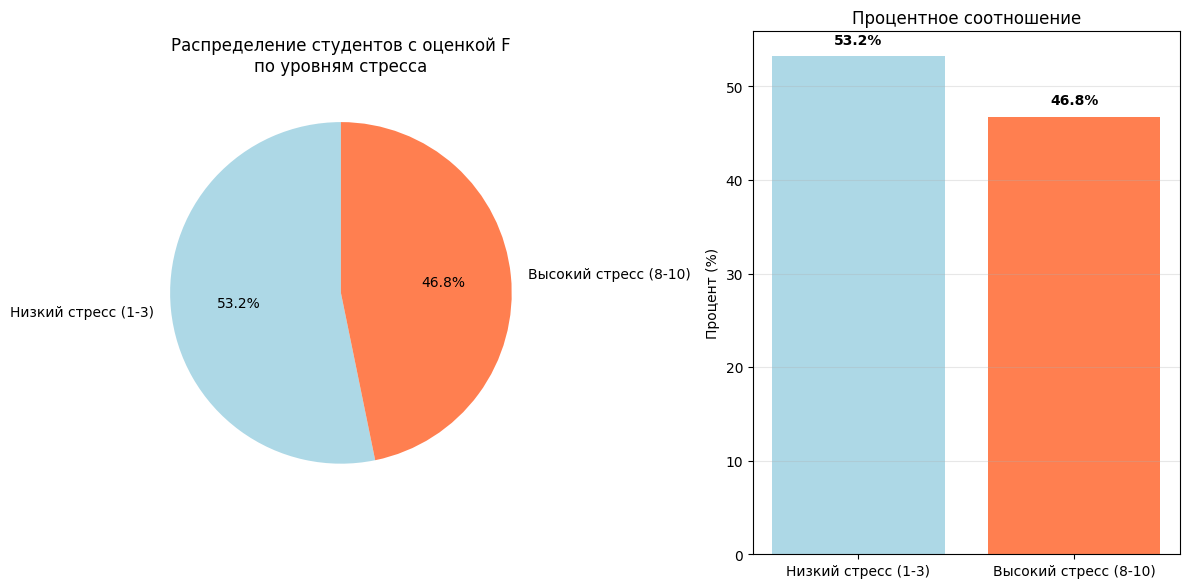

In [11]:
new_df = df.copy()

grades = new_df.loc[:, ['Student_ID', 'Grade', 'Stress_Level (1-10)']]

bins = [1,4,8,11]
labels = ['1-3','4-7','8-10']

grades['Stress_segments'] = pd.cut(grades['Stress_Level (1-10)'], bins=bins, labels=labels, right=False)

stress1_3 = grades[(grades['Stress_segments']=='1-3') & (grades['Grade'] == 'F')]

stress8_10 = grades[(grades['Stress_segments']=='8-10') & (grades['Grade'] == 'F')]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

low_stress_count = len(stress1_3)
high_stress_count = len(stress8_10)

total_f_students = low_stress_count + high_stress_count

labels = ['Низкий стресс (1-3)', 'Высокий стресс (8-10)']
sizes = [low_stress_count, high_stress_count]
colors = ['lightblue', 'coral']

ax1.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
ax1.set_title('Распределение студентов с оценкой F\nпо уровням стресса')

if total_f_students > 0:
    percentages = [low_stress_count/total_f_students*100, high_stress_count/total_f_students*100]
    ax2.bar(labels, percentages, color=colors)
    ax2.set_title('Процентное соотношение')
    ax2.set_ylabel('Процент (%)')
    ax2.grid(axis='y', alpha=0.3)
    
    for i, v in enumerate(percentages):
        ax2.text(i, v + 1, f'{v:.1f}%', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

2 гипотеза

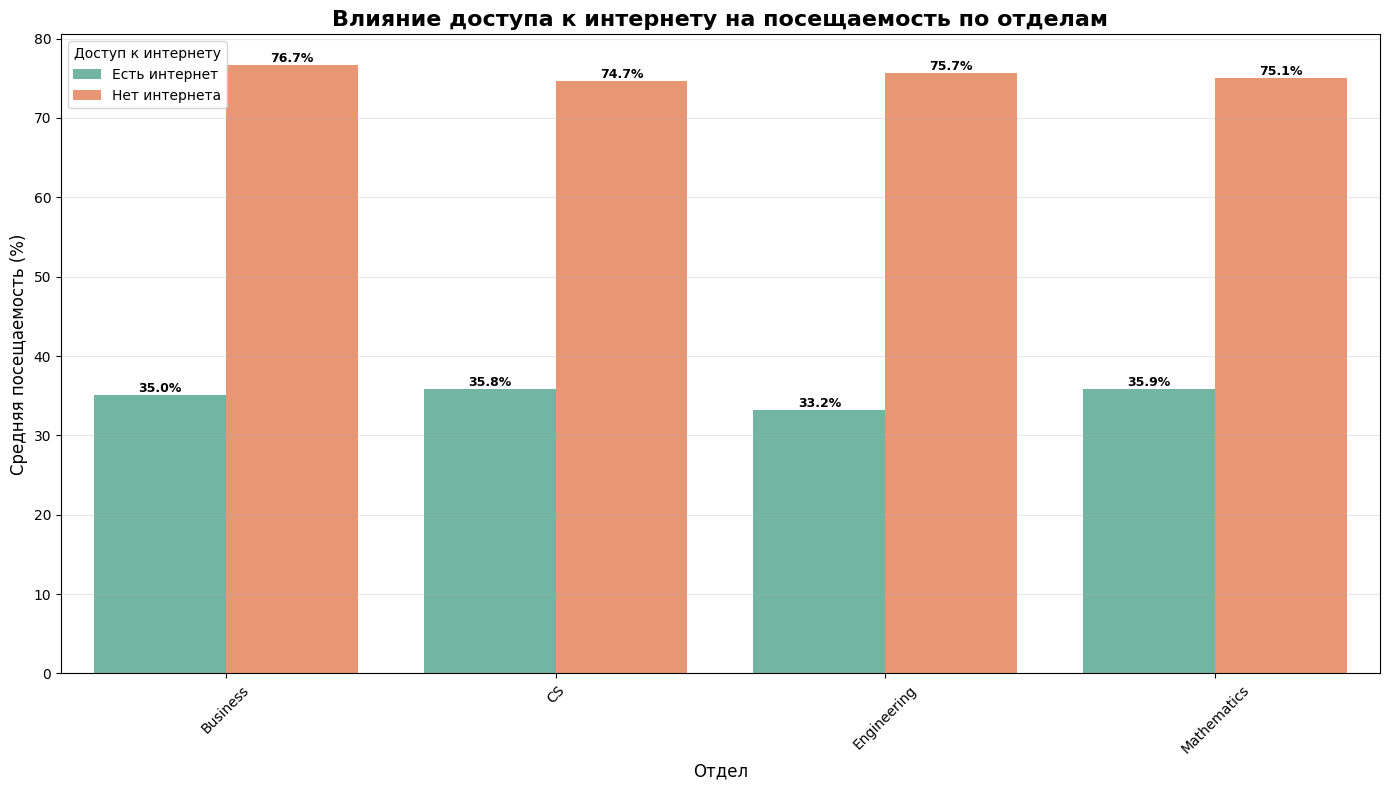

In [12]:
new_df2 = df.copy()

new_df2 = new_df2.loc[:, ['Student_ID', 'Department', 'Attendance (%)', 'Internet_Access_at_Home']]

student_have_internet = new_df2[new_df2['Internet_Access_at_Home'] == 'Yes']
student_not_internet = new_df2[new_df2['Internet_Access_at_Home'] == 'No']

grouped_student_have_internet = student_have_internet.groupby('Department').agg({
    'Attendance (%)':'mean',
})

grouped_student_not_internet = student_not_internet.groupby('Department').agg({
    'Attendance (%)':'mean',
})

grouped_student_have_internet['Internet_Access'] = 'Есть интернет'
grouped_student_not_internet['Internet_Access'] = 'Нет интернета'

combined_internet_data = pd.concat([grouped_student_have_internet, grouped_student_not_internet])

combined_data_reset = combined_internet_data.reset_index()

plt.figure(figsize=(14, 8))
ax = sns.barplot(data=combined_data_reset, x='Department', y='Attendance (%)', hue='Internet_Access',
                palette="Set2")
plt.title('Влияние доступа к интернету на посещаемость по отделам', fontsize=16, fontweight='bold')
plt.xlabel('Отдел', fontsize=12)
plt.ylabel('Средняя посещаемость (%)', fontsize=12)
plt.legend(title='Доступ к интернету')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

for i, p in enumerate(ax.patches):
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{height:.1f}%', 
                   (p.get_x() + p.get_width() / 2., height), 
                   ha='center', va='bottom', 
                   fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

3 гипотеза

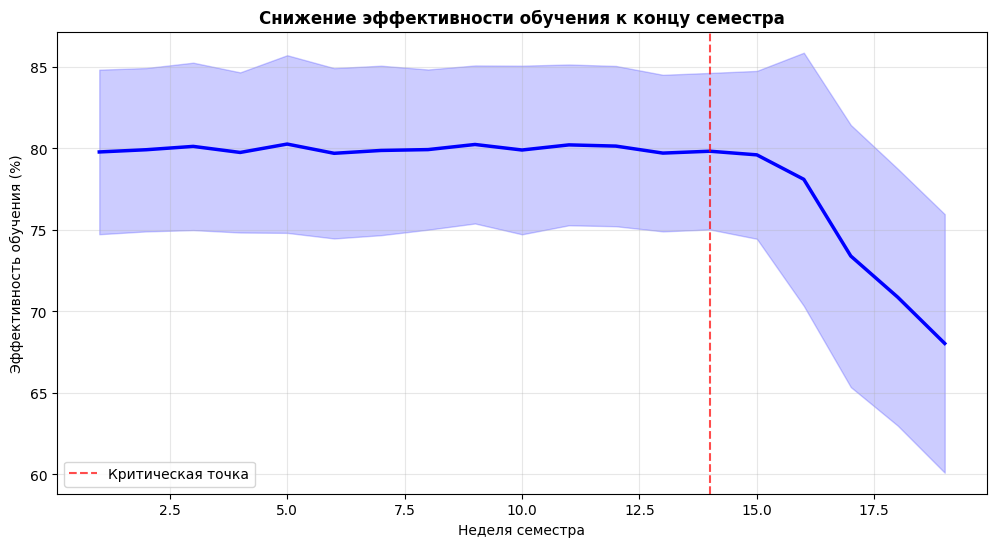

In [13]:
new_df3 = df.copy()

plt.figure(figsize=(12, 6))
sns.lineplot(data=new_df3, x='Week_of_Semester', y='Learning_Efficiency (%)', 
             estimator='mean', errorbar='sd', linewidth=2.5, color='blue')
plt.axvline(x=14, color='red', linestyle='--', alpha=0.7, label='Критическая точка')
plt.title('Снижение эффективности обучения к концу семестра', 
          fontweight='bold')
plt.xlabel('Неделя семестра')
plt.ylabel('Эффективность обучения (%)')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

4 гипотеза

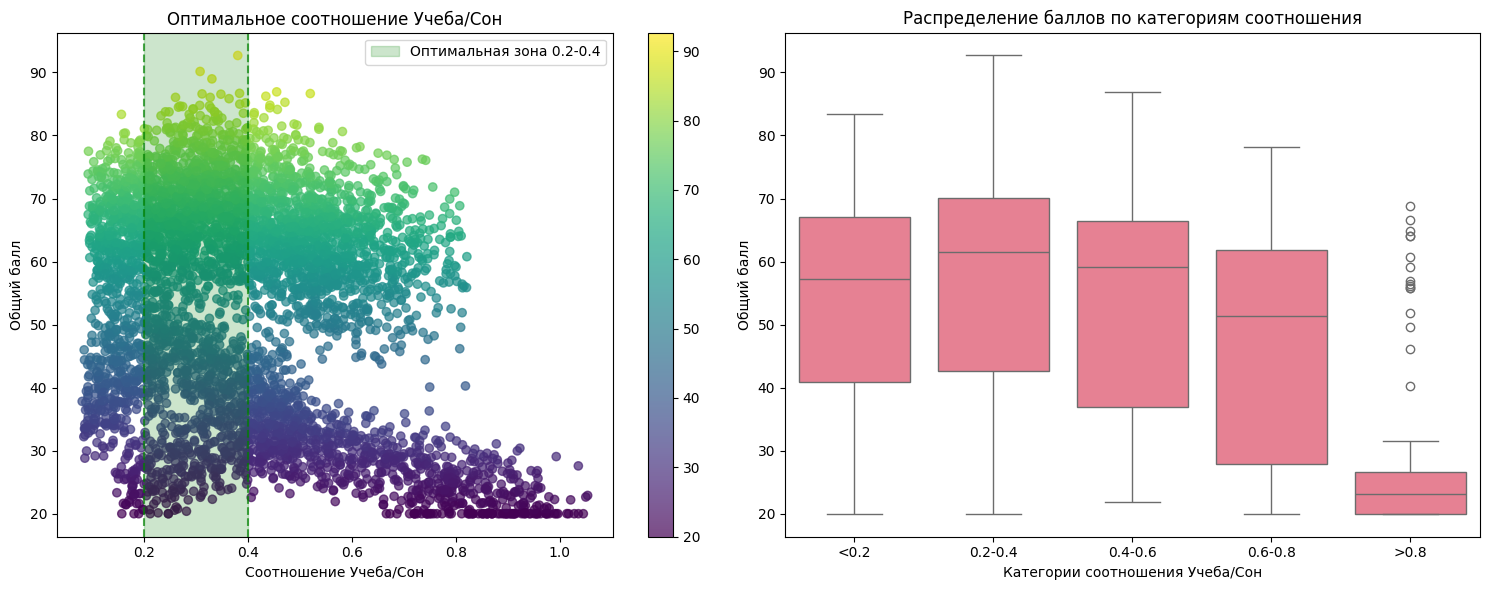

In [14]:
new_df4 = df.copy()
new_df4['Study_Sleep_Ratio'] = new_df4['Study_Hours_per_Week'] / (new_df4['Sleep_Hours_per_Night'] * 7)

plt.style.use('default')
sns.set_palette("husl")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

scatter = ax1.scatter(new_df4['Study_Sleep_Ratio'], new_df4['Total_Score_Original'], 
                     c=new_df4['Total_Score_Original'], cmap='viridis', alpha=0.7)
ax1.axvspan(0.2, 0.4, alpha=0.2, color='green', label='Оптимальная зона 0.2-0.4')
ax1.axvline(0.2, color='green', linestyle='--', alpha=0.7)
ax1.axvline(0.4, color='green', linestyle='--', alpha=0.7)
ax1.set_xlabel('Соотношение Учеба/Сон')
ax1.set_ylabel('Общий балл')
ax1.set_title('Оптимальное соотношение Учеба/Сон')
ax1.legend()
plt.colorbar(scatter, ax=ax1)

new_df4['Ratio_Category'] = pd.cut(new_df4['Study_Sleep_Ratio'], 
                             bins=[0, 0.2, 0.4, 0.6, 0.8, 2],
                             labels=['<0.2', '0.2-0.4', '0.4-0.6', '0.6-0.8', '>0.8'])

sns.boxplot(data=new_df4, x='Ratio_Category', y='Total_Score_Original', ax=ax2)
ax2.set_xlabel('Категории соотношения Учеба/Сон')
ax2.set_ylabel('Общий балл')
ax2.set_title('Распределение баллов по категориям соотношения')

plt.tight_layout()
plt.show()


5 гипотеза

C:\Users\Admin\AppData\Local\Temp\ipykernel_30992\2468233350.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=comparison_data, x='Group', y='Total_Score_Original', ax=axes[0,0], palette='Set2')


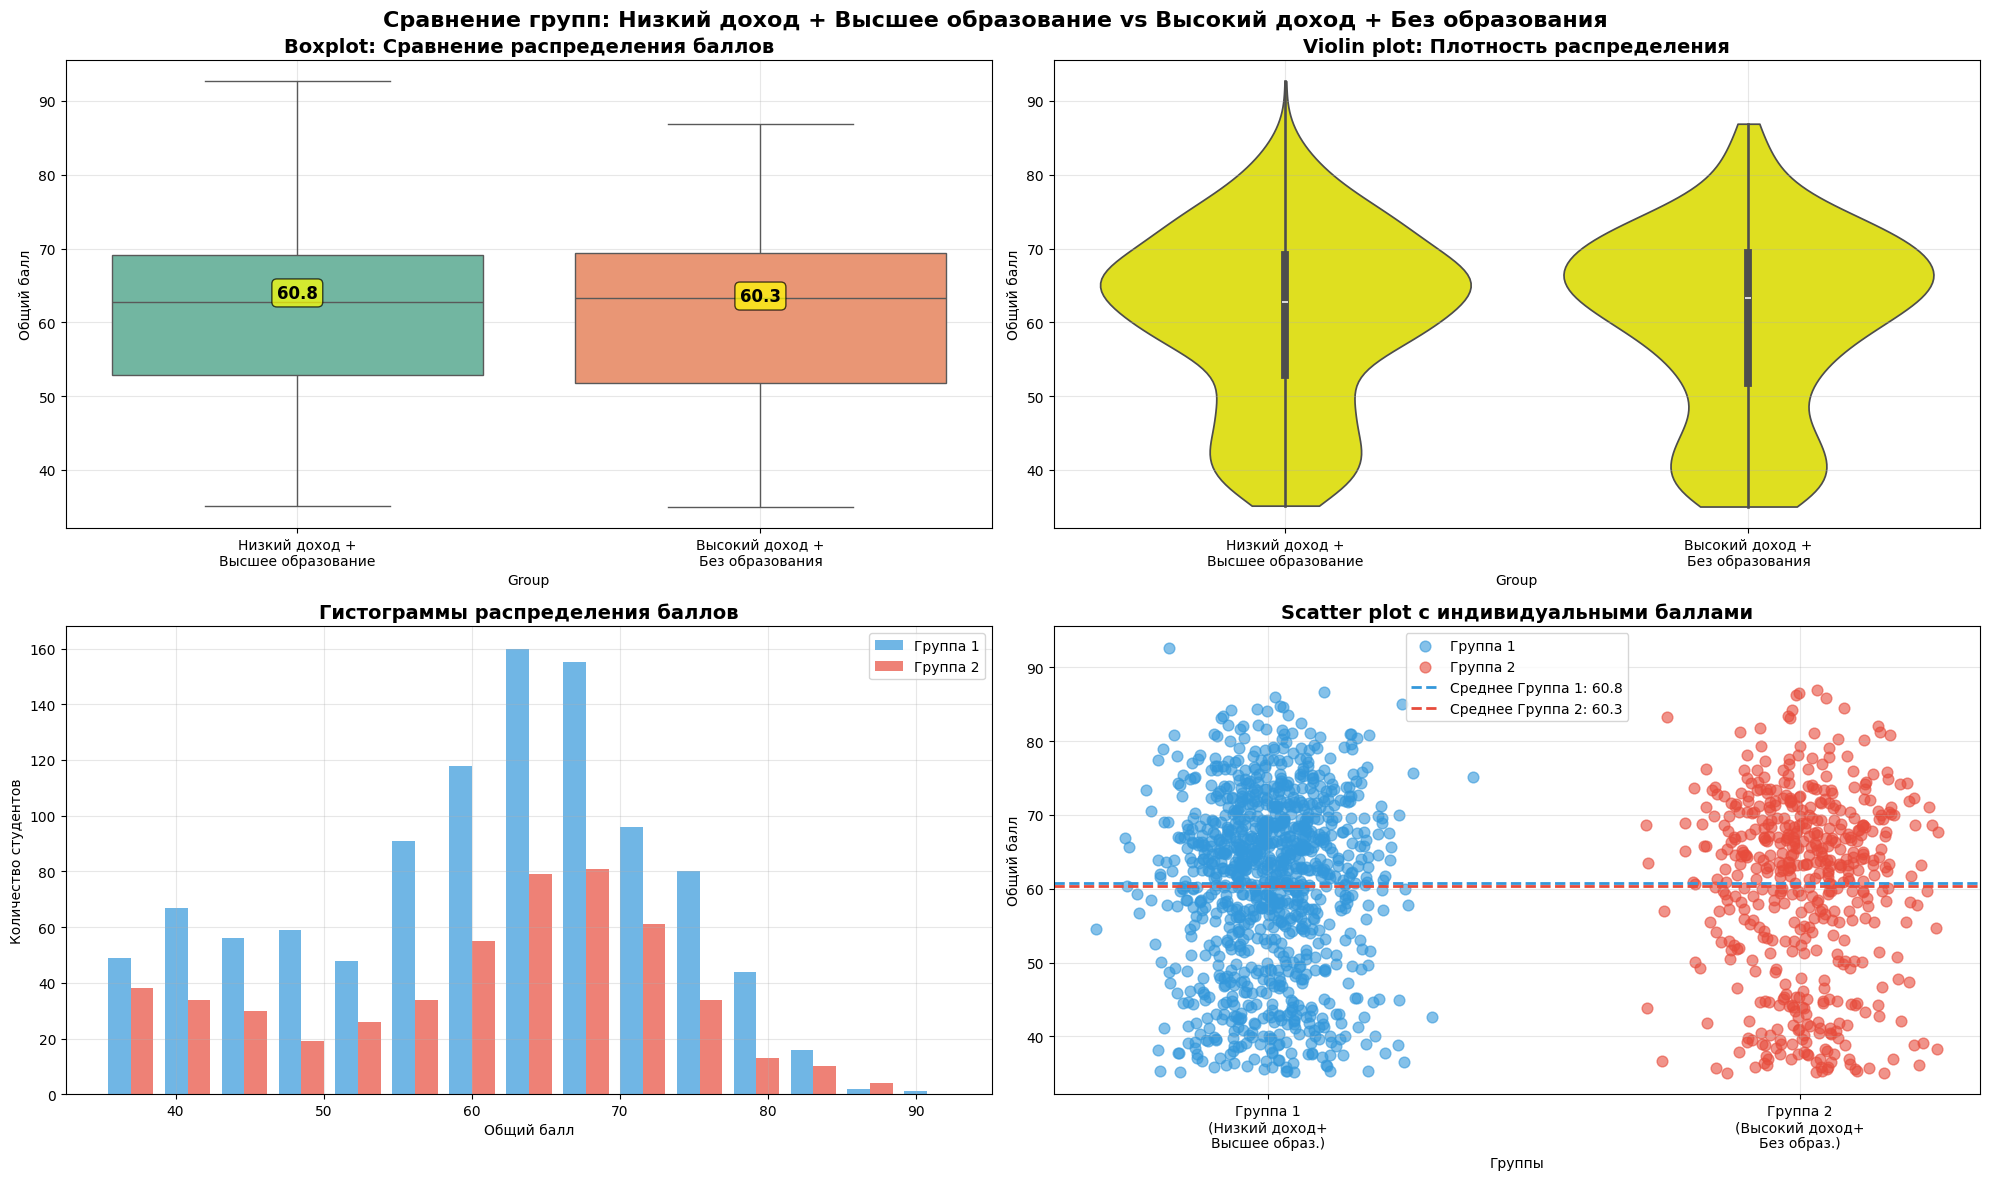

In [20]:
new_df5 = df.copy()

new_df5 = new_df5[new_df5['Total_Score_Original'] >= 35]

group1 = new_df5[(new_df5['Family_Income_Level'] == 'Low') & 
           (new_df5['Parent_Education_Level'] != 'No High Education')]

group2 = new_df5[(new_df5['Family_Income_Level'].isin(['Medium', 'High'])) & 
           (new_df5['Parent_Education_Level'] == 'No High Education')]

group1_score = group1['Total_Score_Original'].mean()
group2_score = group2['Total_Score_Original'].mean()

comparison_data = pd.concat([
    group1.assign(Group='Низкий доход +\nВысшее образование'),
    group2.assign(Group='Высокий доход +\nБез образования')
])

fig, axes = plt.subplots(2, 2, figsize=(20, 12))
fig.suptitle('Сравнение групп: Низкий доход + Высшее образование vs Высокий доход + Без образования', 
             fontsize=16, fontweight='bold', y=0.98)


sns.boxplot(data=comparison_data, x='Group', y='Total_Score_Original', ax=axes[0,0], palette='Set2')
axes[0,0].set_title('Boxplot: Сравнение распределения баллов', fontsize=14, fontweight='bold')
axes[0,0].set_ylabel('Общий балл')
axes[0,0].grid(True, alpha=0.3)


groups = comparison_data['Group'].unique()
for i, group in enumerate(groups):
    group_data = comparison_data[comparison_data['Group'] == group]['Total_Score_Original']
    if len(group_data) > 0:
        mean_score = group_data.mean()
        axes[0,0].text(i, mean_score + 2, f'{mean_score:.1f}', 
                      ha='center', va='bottom', fontweight='bold', fontsize=12,
                      bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7))



sns.violinplot(data=comparison_data, x='Group', y='Total_Score_Original', ax=axes[0,1], cut=0, color='yellow')
axes[0,1].set_title('Violin plot: Плотность распределения', fontsize=14, fontweight='bold')
axes[0,1].set_ylabel('Общий балл')
axes[0,1].grid(True, alpha=0.3)


axes[1,0].hist([group1['Total_Score_Original'], group2['Total_Score_Original']], 
               bins=15, alpha=0.7, label=['Группа 1', 'Группа 2'],
               color=['#3498db', '#e74c3c'])
axes[1,0].set_title('Гистограммы распределения баллов', fontsize=14, fontweight='bold')
axes[1,0].set_xlabel('Общий балл')
axes[1,0].set_ylabel('Количество студентов')
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)


np.random.seed(42)
jitter1 = np.random.normal(0, 0.1, len(group1))
jitter2 = np.random.normal(0, 0.1, len(group2))

axes[1,1].scatter(np.zeros(len(group1)) + jitter1, group1['Total_Score_Original'], 
                 alpha=0.6, s=60, label='Группа 1', color='#3498db')
axes[1,1].scatter(np.ones(len(group2)) + jitter2, group2['Total_Score_Original'], 
                 alpha=0.6, s=60, label='Группа 2', color='#e74c3c')


axes[1,1].axhline(y=group1_score, color='#3498db', linestyle='--', linewidth=2, 
                 label=f'Среднее Группа 1: {group1_score:.1f}')
axes[1,1].axhline(y=group2_score, color='#e74c3c', linestyle='--', linewidth=2, 
                 label=f'Среднее Группа 2: {group2_score:.1f}')


axes[1,1].set_title('Scatter plot с индивидуальными баллами', fontsize=14, fontweight='bold')
axes[1,1].set_xlabel('Группы')
axes[1,1].set_ylabel('Общий балл')
axes[1,1].set_xticks([0, 1])
axes[1,1].set_xticklabels(['Группа 1\n(Низкий доход+\nВысшее образ.)', 
                          'Группа 2\n(Высокий доход+\nБез образ.)'])
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


6 гипотеза

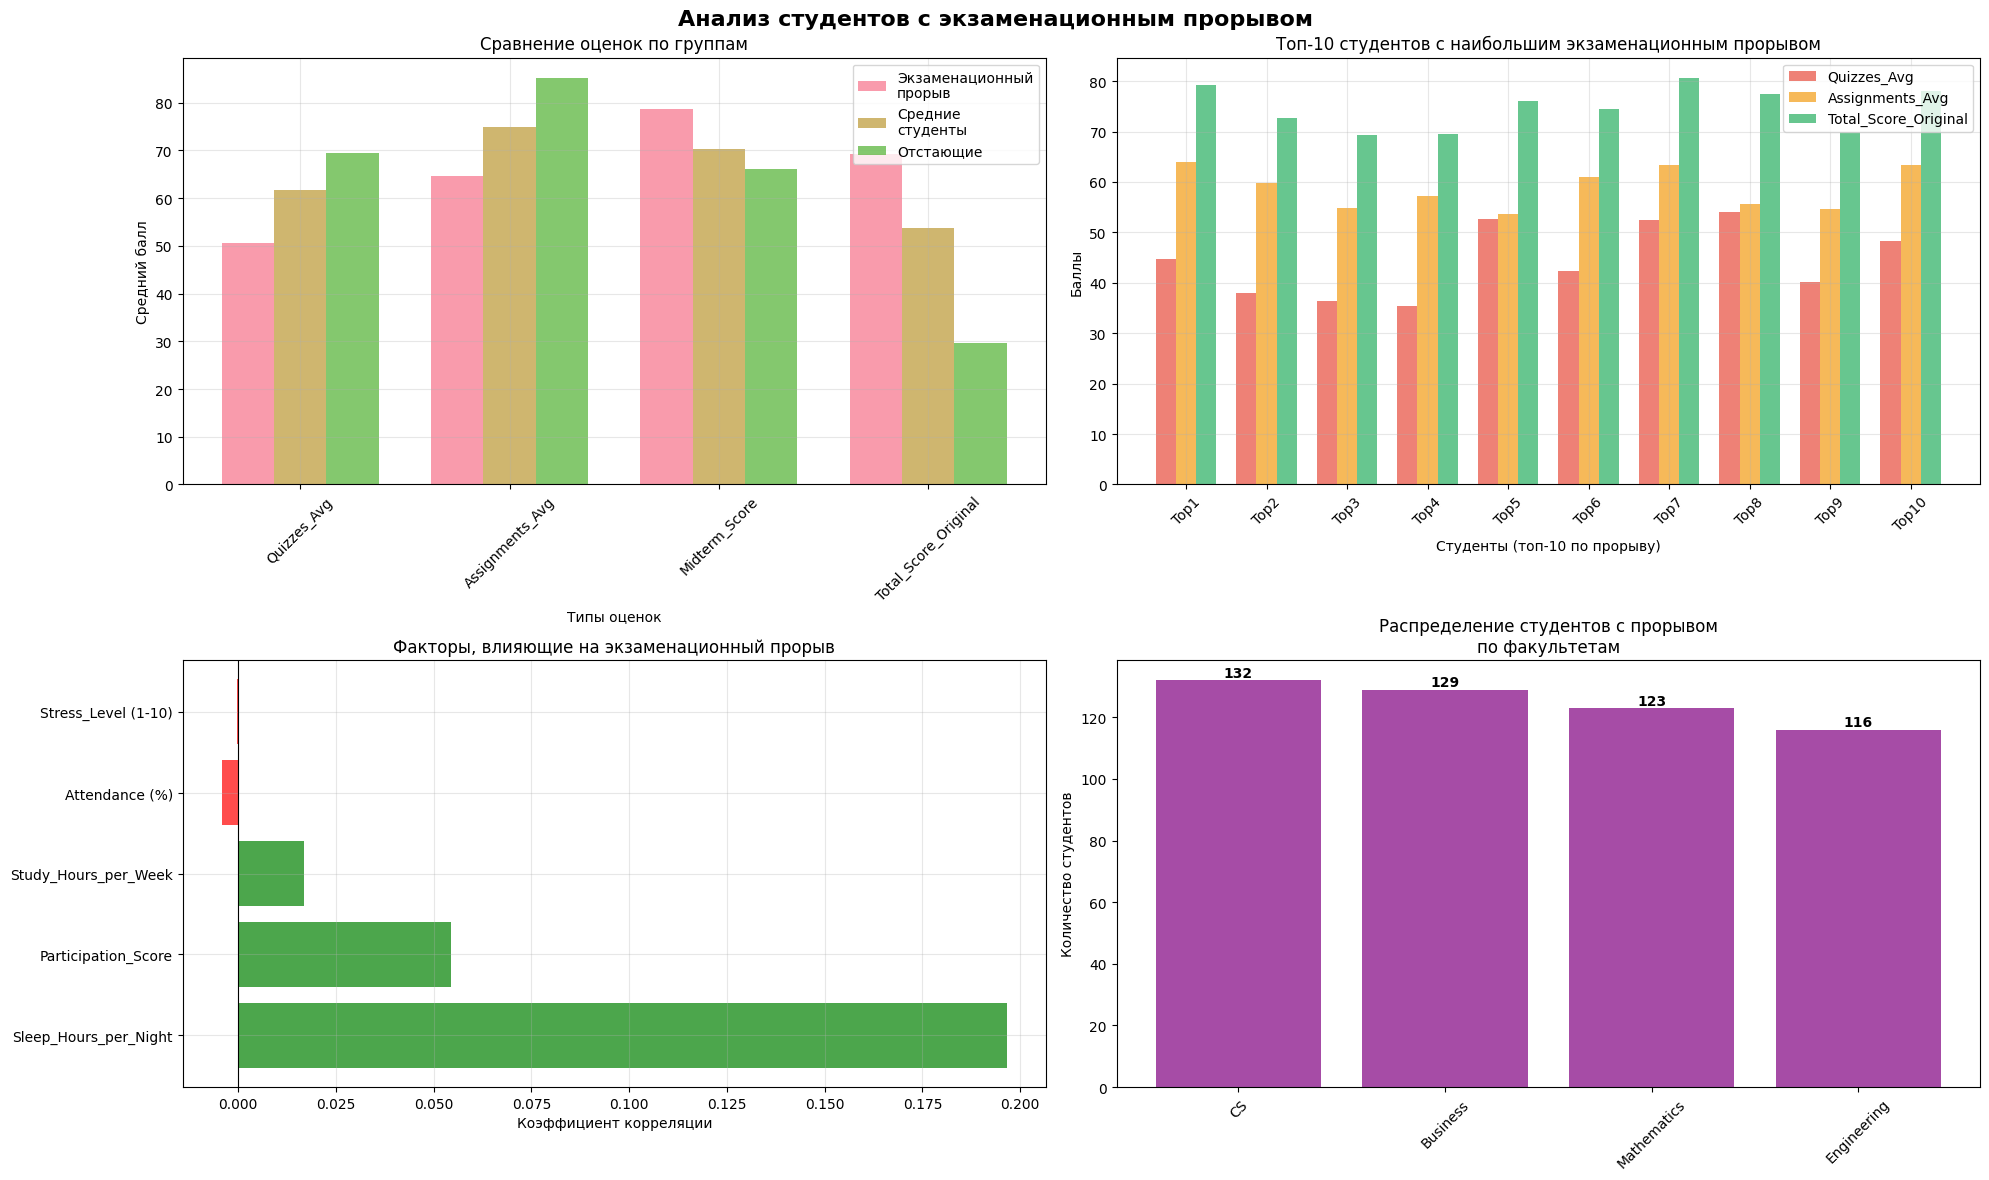

In [33]:
new_df6 = df.copy()

new_df6['Exam_Breakthrough'] = new_df6['Total_Score_Original'] - (new_df6['Quizzes_Avg'] + new_df6['Assignments_Avg']) / 2
breakthrough_threshold = new_df6['Exam_Breakthrough'].quantile(0.9)

high_breakthrough = new_df6[new_df6['Exam_Breakthrough'] >= breakthrough_threshold]
low_breakthrough = new_df6[new_df6['Exam_Breakthrough'] <= new_df6['Exam_Breakthrough'].quantile(0.1)]
average_students = new_df6[(new_df6['Exam_Breakthrough'] > new_df6['Exam_Breakthrough'].quantile(0.1)) & 
                     (new_df6['Exam_Breakthrough'] < new_df6['Exam_Breakthrough'].quantile(0.9))]

fig, axes = plt.subplots(2, 2, figsize=(20, 12))
fig.suptitle('Анализ студентов с экзаменационным прорывом', fontsize=16, fontweight='bold', y=0.98)

groups_comparison = pd.concat([
    high_breakthrough.assign(Group='Экзаменационный\nпрорыв'),
    average_students.assign(Group='Средние\nстуденты'), 
    low_breakthrough.assign(Group='Отстающие')
])

metrics = ['Quizzes_Avg', 'Assignments_Avg', 'Midterm_Score', 'Total_Score_Original']
x = np.arange(len(metrics))
width = 0.25

for i, group in enumerate(['Экзаменационный\nпрорыв', 'Средние\nстуденты', 'Отстающие']):
    group_data = groups_comparison[groups_comparison['Group'] == group]
    values = [group_data[metric].mean() for metric in metrics]
    axes[0,0].bar(x + i*width, values, width, label=group, alpha=0.7)

axes[0,0].set_xlabel('Типы оценок')
axes[0,0].set_ylabel('Средний балл')
axes[0,0].set_title('Сравнение оценок по группам')
axes[0,0].set_xticks(x + width)
axes[0,0].set_xticklabels(metrics, rotation=45)
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)



top_10_breakthrough = new_df6.nlargest(10, 'Exam_Breakthrough')[['Student_ID', 'Exam_Breakthrough', 
                                                           'Quizzes_Avg', 'Assignments_Avg', 'Total_Score_Original']]

x_pos = np.arange(len(top_10_breakthrough))
width = 0.25

axes[0,1].bar(x_pos - width, top_10_breakthrough['Quizzes_Avg'], width, 
              label='Quizzes_Avg', alpha=0.7, color='#e74c3c')
axes[0,1].bar(x_pos, top_10_breakthrough['Assignments_Avg'], width, 
              label='Assignments_Avg', alpha=0.7, color='#f39c12')
axes[0,1].bar(x_pos + width, top_10_breakthrough['Total_Score_Original'], width, 
              label='Total_Score_Original', alpha=0.7, color='#27ae60')

axes[0,1].set_xlabel('Студенты (топ-10 по прорыву)')
axes[0,1].set_ylabel('Баллы')
axes[0,1].set_title('Топ-10 студентов с наибольшим экзаменационным прорывом')
axes[0,1].set_xticks(x_pos)
axes[0,1].set_xticklabels([f'Top{i+1}' for i in range(10)], rotation=45)
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)


factors = ['Study_Hours_per_Week', 'Attendance (%)', 'Stress_Level (1-10)', 
           'Sleep_Hours_per_Night', 'Participation_Score']

factor_data = []
for factor in factors:
    if factor in new_df6.columns:
        correlation = new_df6['Exam_Breakthrough'].corr(new_df6[factor])
        factor_data.append((factor, correlation))

factor_data.sort(key=lambda x: abs(x[1]), reverse=True)
factors_sorted = [x[0] for x in factor_data[:5]]
correlations_sorted = [x[1] for x in factor_data[:5]]

colors = ['green' if corr > 0 else 'red' for corr in correlations_sorted]
bars = axes[1,0].barh(factors_sorted, correlations_sorted, color=colors, alpha=0.7)


axes[1,0].set_xlabel('Коэффициент корреляции')
axes[1,0].set_title('Факторы, влияющие на экзаменационный прорыв')
axes[1,0].axvline(0, color='black', linewidth=0.8)
axes[1,0].grid(True, alpha=0.3)

    
dept_breakthrough = high_breakthrough['Department'].value_counts().head(5)
axes[1,1].bar(dept_breakthrough.index, dept_breakthrough.values, alpha=0.7, color='purple')
axes[1,1].set_title('Распределение студентов с прорывом\nпо факультетам')
axes[1,1].set_ylabel('Количество студентов')
axes[1,1].tick_params(axis='x', rotation=45)
for i, count in enumerate(dept_breakthrough.values):
    axes[1,1].text(i, count + 0.1, str(count), ha='center', va='bottom', fontweight='bold')


plt.tight_layout()
plt.show()